In [1]:
import nibabel as nib
import numpy as np
import cv2
import os
import scipy
import sklearn
import matplotlib.pyplot as plt
import torch
import re
import torchvision
from sklearn.cluster import KMeans
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from skimage import data, exposure, img_as_float

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

from skimage import exposure, io, util
from skimage import color, morphology
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter
from skimage.segmentation import flood, flood_fill
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import plotly
import plotly.express as px

In [2]:
import cv2
import numpy as np
import glob
import os

def matric_to_image_seq(matric, output_path='./Output/'):
    count = 0
    image = matric[count,:,:]
    print("converting video to frames...")
    while image is not np.empty:
        fname = str(count).zfill(3)
        cv2.imwrite(os.path.join(output_path, fname + ".jpg"), np.uint8(image)*255)  # save frame as JPEG file
        count += 1
        image = matric[count]
        # print('Read a new frame: ', success)
        
    print("total frames: ", count)

In [26]:
def plot_hist(ax, data, title=None):
    # Helper function for plotting histograms
    ax.hist(data.ravel(), bins=256)
    ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))

    if title:
        ax.set_title(title)


def plot_comparison(original, filtered, filter_name):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

def plot_comparison_loop(n):
    
    fig, axis_list = plt.subplots(ncols=n, figsize=(10, 10), sharex=True,
                                   sharey=True)
    return axis_list
    
def imshow(image, axis_list=[], title="Image #", n=0):

    if axis_list == []:
        axis_list = plot_comparison_loop(1)
        axis_list = [axis_list]
    axis_list[n].imshow(image, cmap=plt.cm.gray)
    axis_list[n].set_title(f'{title} #{n}')
    axis_list[n].axis('off')

def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)


def imshowA(img, title='', name=''):
    #for plotting and saving the image
    path = "./output/"+name+".jpg"
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.set_axis_off()
    plt.show()
    #cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [5]:
imgs_list= []
path_frames = "./oblong_gel_ddw_sub"
file_name = "oblong_gel_ddw_sub_"
for idx , frame in enumerate(os.listdir(path_frames)):
  frame = Image.open(f'{path_frames}/{file_name}{idx}.tif')
  frame = np.array(frame)
  imgs_list.append(frame)
cell_tunnels = np.array(imgs_list[::2])
cell_caseing = np.array(imgs_list[1::2])
shape = np.shape(cell_tunnels)
data = np.zeros((shape[0], 2, shape[1], shape[2]))
data[:,0,:,:] = cell_caseing;
data[:,1,:,:] = cell_tunnels;

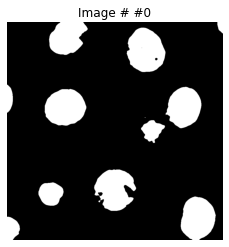

In [19]:
imgs_list= []
path_frames = "./Closed"
file_name = ""
for idx , frame in enumerate(os.listdir(path_frames)):
  framenum = f'{idx}'.zfill(3)
  frame = Image.open(f'{path_frames}/{file_name}{framenum}.jpg')
  frame = np.array(frame)
  imgs_list.append(frame)
maskCh1 = imgs_list
imshowA(maskCh1[32])

C:\Users\roydo\AppData\Local\Temp/ipykernel_3632/2136913476.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if axis_list == []:


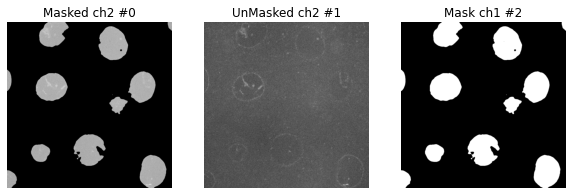

In [27]:
filteredCh2 = cell_tunnels*np.uint8(maskCh1)
axislist = plot_comparison_loop(3)
imshow(filteredCh2[32],axislist, title = "Masked ch2",n = 0)
imshow(cell_tunnels[32],axislist, title = "UnMasked ch2",n = 1)
imshow(maskCh1[32],axislist, title = "Mask ch1",n = 2)




In [38]:
import SimpleITK as sitk


binary_image = sitk.BinaryThreshold(maskCh1, 0.5, 1, 1, 0)
filledMask = sitk.BinaryFillhole(binary_image)

TypeError: in method 'BinaryThreshold', argument 1 of type 'itk::simple::Image const &'